**This is an analysis of Exceed Petroleum's database of all their assets of retail oulets in Pakistan. We will analyse sites based on their operational status and map them on an interactive map for management to easily run through and plan their pricing plans considering how close a site is to the primary freight locations.**

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_excel('/Users/harrisasadb/Desktop/jupyter notebooks/data sets/Complete Detail of Petrol Pump Sites.xlsx',sheet_name = 'Site Detail (Available)')


In [148]:
df.head()

,Sr #,Existing File No.,Dealer Name,Site Address,District,Rent P.M.,Rent Starting Term,Lease Date,Rent Start,Security Deposit,Joining Fee,Site Category,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment
0,1,AK-01,Mr. Asmar Khan,"At Mouza Kamal Pur Sher Jang, Mainm Kohat-Pind...",Attock,1000.0,Commissioning of filling station,08-09-2016,NaN,100000.0,300000.0,DF,Signed,Received,Registered,Received,Received,NaN,0300-3495667,NaN
1,2,AK-02,Saeed Abdullah,"At Mouza Kamaryal, Tehsil Pindi Gheb, Distt:",Attock,1000.0,Commissioning of filling station,07-10-2015,NaN,100000.0,300000.0,DF,Signed,Received,Registered,Received,Received,Applied,0300-5263286,NaN
2,3,AK-03,Mr. Tahir Farooq,"At Mouza Orang Abad, Tehsil Jand, Distt:",Attock,1000.0,Commissioning of filling station,5-1-2017,NaN,100000.0,300000.0,DF,Signed,Received,Registered,Received,NaN,NaN,0300-5250975,NaN
3,4,Ak-04,Mr. Zafar Iqbal,"At Mouza Thoya, Tehsil Pindi Gheb, Distt:",Attock,1000.0,Commissioning of filling station,2016-10-05 00:00:00,NaN,100000.0,350000.0,DF,Signed,Received,Registered,Received,NaN,NaN,0336-5063277,NaN
4,5,Ak-05,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,1000.0,Commissioning of filling station,15-04-2015,NaN,100000.0,350000.0,DF,Signed,Received,Registered,Received,Received,Received,"0334-9576160, 0333-5149023",full signage


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sr #                   260 non-null    int64  
 1   Existing File No.      260 non-null    object 
 2   Dealer Name            260 non-null    object 
 3   Site Address           260 non-null    object 
 4   District               260 non-null    object 
 5   Rent P.M.              259 non-null    float64
 6   Rent Starting Term     259 non-null    object 
 7   Lease Date             89 non-null     object 
 8   Rent Start             0 non-null      float64
 9   Security Deposit       255 non-null    float64
 10  Joining Fee            255 non-null    float64
 11  Site Category          258 non-null    object 
 12  Offer Letter           190 non-null    object 
 13  D.C. NOC Status        254 non-null    object 
 14  Lease Status           113 non-null    object 
 15  Constr

**The overly repeated columns need to be removed**

In [150]:
df = df.drop(['Site Category', 'Rent P.M.', 'Rent Start', 'Rent Starting Term', 'Sr #'],axis = 1)

In [151]:
df.head()

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment
0,AK-01,Mr. Asmar Khan,"At Mouza Kamal Pur Sher Jang, Mainm Kohat-Pind...",Attock,08-09-2016,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-3495667,NaN
1,AK-02,Saeed Abdullah,"At Mouza Kamaryal, Tehsil Pindi Gheb, Distt:",Attock,07-10-2015,100000.0,300000.0,Signed,Received,Registered,Received,Received,Applied,0300-5263286,NaN
2,AK-03,Mr. Tahir Farooq,"At Mouza Orang Abad, Tehsil Jand, Distt:",Attock,5-1-2017,100000.0,300000.0,Signed,Received,Registered,Received,NaN,NaN,0300-5250975,NaN
3,Ak-04,Mr. Zafar Iqbal,"At Mouza Thoya, Tehsil Pindi Gheb, Distt:",Attock,2016-10-05 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,0336-5063277,NaN
4,Ak-05,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,15-04-2015,100000.0,350000.0,Signed,Received,Registered,Received,Received,Received,"0334-9576160, 0333-5149023",full signage


**The names of districs need to be formatted to correct names, so their location can be tracked online properly**

In [152]:
df['District'] = df['District'].replace(to_replace='bahawalpur',value='Bahwalpur')
df['District'] = df['District'].replace(to_replace='Naroowal',value='Narowal')
df['District'] = df['District'].replace(to_replace='sawabi',value='Sawabi')
df['District'] = df['District'].replace(to_replace='Bahwalpur',value='Bahawalpur')
df['District'] = df['District'].replace(to_replace='DG khan',value='D.G Khan')
df['District'] = df['District'].replace(to_replace='D.I khan',value='D.I Khan')
df['District'] = df['District'].replace(to_replace='DG khan',value='D.G Khan')
df['District'] = df['District'].replace(to_replace='AJK',value='Azad Jammu Kashmir')
df['District'] = df['District'].replace(to_replace='D.G Khan',value='Dera Ghazi Khan')
df['District'] = df['District'].replace(to_replace='D.I Khan',value='Dera Ismail Khan')
df['District'] = df['District'].replace(to_replace='Mandi B.Din',value='Mandi Bahauddin')


df['District'].unique()

array(['Attock', 'Azad Jammu Kashmir', 'Bhimber AJK', 'Bhakkar',
       'Bahawalnagar', 'Bahawalpur', 'Bannu', 'Chakwal',
       'Dera Ghazi Khan', 'Dera Ismail Khan', 'Faisalabad', 'Gujranwala',
       'Gujrat', 'Hafizabad', 'Jhang', 'Jhelum', 'Kasur', 'Khanewal',
       'Lodhran', 'Lahore', 'Layyah', 'Mandi Bahauddin', 'Multan',
       'Skardu', 'Juglote', 'Mansehra', 'Mardan', 'Mianwali',
       'Muzaffargarh', 'Nankana', 'Narowal', 'Okara', 'Peshawar',
       'Dir Lower', 'Buner', 'Rajanpur', 'Rawalpindi', 'Rahim Y.Khan',
       'Sawabi', 'Sahiwal', 'Sheikhupura', 'Sialkot', 'Swat',
       'Shangla (Swat)'], dtype=object)

In [153]:
from geopy.geocoders import ArcGIS
nom = ArcGIS()

In [165]:
nom.geocode('At Mouza Thoya, Tehsil Pindi Gheb, Distt:, Attock, Pakistan').longitude # to check whether it works for this address

72.26609000000008

In [166]:
df['Address'] = df['Site Address'] + ' ' + df['District'] + ', Pakistan'


'At Mouza Thoya, Tehsil Pindi Gheb, Distt: Attock, Pakistan'

In [167]:
df['coordinates'] = df['Address'].apply(nom.geocode) # this will add column of full addresses for all locations

In [171]:
df['Latitude'] = df['coordinates'].apply(lambda x:x.latitude)
df['Longitude'] = df['coordinates'].apply(lambda x:x.longitude)

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
0,AK-01,Mr. Asmar Khan,"At Mouza Kamal Pur Sher Jang, Mainm Kohat-Pind...",Attock,08-09-2016,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-3495667,NaN,"At Mouza Kamal Pur Sher Jang, Mainm Kohat-Pind...","(Kohāt, North-West Frontier Province, (33.5819...",33.58196,71.44929
1,AK-02,Saeed Abdullah,"At Mouza Kamaryal, Tehsil Pindi Gheb, Distt:",Attock,07-10-2015,100000.0,300000.0,Signed,Received,Registered,Received,Received,Applied,0300-5263286,NaN,"At Mouza Kamaryal, Tehsil Pindi Gheb, Distt: A...","(Pindi Gheb, Punjab, (33.24024000000003, 72.26...",33.24024,72.26609
2,AK-03,Mr. Tahir Farooq,"At Mouza Orang Abad, Tehsil Jand, Distt:",Attock,5-1-2017,100000.0,300000.0,Signed,Received,Registered,Received,NaN,NaN,0300-5250975,NaN,"At Mouza Orang Abad, Tehsil Jand, Distt: Attoc...","(Jand, Punjab, (33.429850000000044, 72.0192800...",33.42985,72.01928
3,Ak-04,Mr. Zafar Iqbal,"At Mouza Thoya, Tehsil Pindi Gheb, Distt:",Attock,2016-10-05 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,0336-5063277,NaN,"At Mouza Thoya, Tehsil Pindi Gheb, Distt: Atto...","(Pindi Gheb, Punjab, (33.24024000000003, 72.26...",33.24024,72.26609
4,Ak-05,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,15-04-2015,100000.0,350000.0,Signed,Received,Registered,Received,Received,Received,"0334-9576160, 0333-5149023",full signage,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt...","(Hassan Abdāl, Punjab, (33.82296000000008, 72....",33.82296,72.68725


In [225]:
#So most of our retail sites are in punjab, primarily in south Punjab
NOC_Only = (df[(df['D.C. NOC Status'] == 'Received') & 
               (df['Lease Status'].isnull()) & (df['Construction Approval'].isnull()) &
               (df['Form "K" Status'].isnull()) & (df['RTD Certificate'].isnull())])
NOC_Only['District'].value_counts() #These sites need to be registered with company ASAP

Peshawar            10
Mandi Bahauddin      3
Rahim Y.Khan         2
Hafizabad            2
Dera Ismail Khan     2
Buner                1
Multan               1
Gujrat               1
Sialkot              1
Narowal              1
Swat                 1
Bannu                1
Name: District, dtype: int64

In [226]:
Registered_Sites_Only = (df[(df['Lease Status'] == 'Registered') & (df['Construction Approval'].isnull()) &
               (df['Form "K" Status'].isnull()) & (df['RTD Certificate'].isnull()) & 
                            (df['D.C. NOC Status'] == 'Received')])
Registered_Sites_Only #These sites need their construction approval to be applied ASAP

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
18,BK-06,Mr. Khalid Ali,"At Mouza Khan Pur Shumali, Distt:",Bhakkar,NaN,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0333-8900123\n0345-8900123,NaN,"At Mouza Khan Pur Shumali, Distt: Bhakkar, Pak...","(Khānpur Shimāli, Punjab, (30.143220000000042,...",30.14322,71.22986
23,BK-11,Mr. Mehboob Alahi,At Mouza Maibal Dagar Tehsil Kallur Kot,Bhakkar,2019-09-13 00:00:00,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0347-8900512,NaN,At Mouza Maibal Dagar Tehsil Kallur Kot Bhakka...,"(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
75,GT-08,Malik M. Shafique,At Mouza Fateh Pur Tehsil; & Distt:,Gujrat,2018-07-04 00:00:00,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0300-6251280,NaN,"At Mouza Fateh Pur Tehsil; & Distt: Gujrat, Pa...","(Fateh Pur, Balochistān, (28.14940000000007, 6...",28.14940,67.95210
88,HZ-12,Mr. Zafar Iqbal,At Mouza Kot Sarwar Tehsil Pindi Bhattain,Hafizabad,2019-10-11 00:00:00,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0300-7529266\n0315-7529266,NaN,At Mouza Kot Sarwar Tehsil Pindi Bhattain Hafi...,"(Hāfizābād, Punjab, (32.06786000000005, 73.685...",32.06786,73.68545
109,Ly-04,Mr. Ehsan Ul Haq,"At Chak No. 112/TDA, Distt:",Layyah,2019-05-16 00:00:00,100000.0,300000.0,NaN,Received,Registered,NaN,NaN,NaN,0300-8763048,NaN,"At Chak No. 112/TDA, Distt: Layyah, Pakistan","(Chak, Sindh, (27.85754000000003, 68.832920000...",27.85754,68.83292
124,MN-01,Wazir Himayar Ali,Mouza Stak Nala tehsil Roundo,Skardu,NaN,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,NaN,NaN,"Mouza Stak Nala tehsil Roundo Skardu, Pakistan","(Skārdu, Gilgit-Baltistan, (35.28851000000003,...",35.28851,75.63334
133,MZ-01,Mr. Ghulam Mustafa,"At Mouza Panwar Janobi, Tehsil Kot Addu, Distt:",Muzaffargarh,NaN,100000.0,300000.0,Signed,Received,Registered,NaN,NaN,NaN,0301-6984882,NaN,"At Mouza Panwar Janobi, Tehsil Kot Addu, Distt...","(Muzaffargarh, Punjab, (30.075370000000078, 71...",30.07537,71.19213
150,NL-07,Mr. Azeem Sarwar,"At Mouza Ogger Wala, Tehsil Zafarwal, Distt:",Narowal,2019-05-16 00:00:00,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0301-4646271,NaN,"At Mouza Ogger Wala, Tehsil Zafarwal, Distt: ...","(Nārowāl, Punjab, (32.10000000000008, 74.88333...",32.10000,74.88333
158,PR-02,Saadatullah Khan,"At Mouza Wari Bazar, Distt: U.Dir",Peshawar,30-7-2015,100000.0,200000.0,Signed,Received,Registered,NaN,NaN,NaN,0345-8008777,NaN,"At Mouza Wari Bazar, Distt: U.Dir Peshawar, Pa...","(Peshāwar, North-West Frontier Province, (34.0...",34.00800,71.57849
183,RJ-07,Mr. Abdul Ghaffar,"At Mouza Rajanpur 2, Distt:",Rajanpur,NaN,100000.0,350000.0,Signed,Received,Registered,NaN,NaN,NaN,0333-6447478,NaN,"At Mouza Rajanpur 2, Distt: Rajanpur, Pakistan","(Rājanpur, Punjab, (29.10351000000003, 70.3250...",29.10351,70.32504


In [227]:
Contruction_Approval_Received = (df[(df['Construction Approval'] == 'Received') &
               (df['Form "K" Status'].isnull()) & (df['RTD Certificate'].isnull())])
Contruction_Approval_Received # These sites need to be contructed in 6 months 

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
2,AK-03,Mr. Tahir Farooq,"At Mouza Orang Abad, Tehsil Jand, Distt:",Attock,5-1-2017,100000.0,300000.0,Signed,Received,Registered,Received,NaN,NaN,0300-5250975,NaN,"At Mouza Orang Abad, Tehsil Jand, Distt: Attoc...","(Jand, Punjab, (33.429850000000044, 72.0192800...",33.42985,72.01928
3,Ak-04,Mr. Zafar Iqbal,"At Mouza Thoya, Tehsil Pindi Gheb, Distt:",Attock,2016-10-05 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,0336-5063277,NaN,"At Mouza Thoya, Tehsil Pindi Gheb, Distt: Atto...","(Pindi Gheb, Punjab, (33.24024000000003, 72.26...",33.24024,72.26609
14,BK-02,Mr. M. Matloob,"At Mouza Dilanamday, Tehsil Kaloor Kot, Distt:",Bhakkar,14-03-2018,100000.0,300000.0,Signed,Received,Registered,Received,NaN,NaN,"0333-7655050, 0345-7655059",Road Sign,"At Mouza Dilanamday, Tehsil Kaloor Kot, Distt:...","(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
22,BK-10,Mr. Zia Ullah Khan,"At Mouza Bharmi Nawab Sb, Distt:",Bhakkar,NaN,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,"0333-8045454, 0336-7647294",NaN,"At Mouza Bharmi Nawab Sb, Distt: Bhakkar, Paki...","(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
104,LD-02,Mr. Rustum Ali Watoo,At Mouza Chatti Distt: Lodhran,Lodhran,NaN,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,0345-1232976,NaN,"At Mouza Chatti Distt: Lodhran Lodhran, Pakistan","(Lodhrān, Punjab, (29.54051000000004, 71.63357...",29.54051,71.63357
132,MW-01,Mr. Umar Hayat Khan,"At Mouza Mouch Pakka, Distt:",Mianwali,06-02-2018,100000.0,350000.0,NaN,Received,Registered,Received,NaN,NaN,0300-7259508,NaN,"At Mouza Mouch Pakka, Distt: Mianwali, Pakistan","(Miānwāli, Punjab, (32.574100000000044, 71.526...",32.57410,71.52639
147,NL-04,Mr. Faiz Rasul,"At Mouza Dailra, Tehsil Zafarwal, Distt:",Narowal,22-2-2017,100000.0,300000.0,NaN,Received,Registered,Received,NaN,NaN,0300-4407986,NaN,"At Mouza Dailra, Tehsil Zafarwal, Distt: Narow...","(Nārowāl, Punjab, (32.10000000000008, 74.88333...",32.10000,74.88333
184,RP-01,Mr. Sardaraz Khan,"At Mouza Mourah Noor, Bani Gala",Rawalpindi,2016-09-15 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,NaN,NaN,NaN,NaN,"At Mouza Mourah Noor, Bani Gala Rawalpindi, Pa...","(Rāwalpindi, Punjab, (33.600700000000074, 73.0...",33.60070,73.06790
198,RY-10,Mr. Umer Hassan,"At Mouza Noor Wala, Tehsil Liquat, Distt:",Rahim Y.Khan,18-09-2017,100000.0,350000.0,NaN,Received,Registered,Received,NaN,NaN,0300-2480615,NaN,"At Mouza Noor Wala, Tehsil Liquat, Distt: Rahi...","(Khān, Punjab, (31.43880000000007, 71.70337000...",31.43880,71.70337
224,SP-01,Mr. Abid Hussain,At Mouza Madar Sharif 14 Km From Jaranwala Roa...,Sheikhupura,10-12-2014,100000.0,300000.0,Signed,Received,Registered,Received,NaN,NaN,0322-4496508,NaN,At Mouza Madar Sharif 14 Km From Jaranwala Roa...,"(Sheikhupura, Punjab, (31.71306000000004, 73.9...",31.71306,73.97833


In [228]:
Form_K_Received =  (df[(df['Form "K" Status'] == 'Received') & (df['RTD Certificate'].isnull())])
Form_K_Received #These Are fully operational sites where petroleum products can be sold, Their RTD certificate needs to be applied

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
8,AZ-01,Mr. Manzoor Hussain,khar khato po khas kharian,Azad Jammu Kashmir,2015-06-09 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0301-6220896,Company Signage,khar khato po khas kharian Azad Jammu Kashmir...,"(Kashmīr, Punjab, (30.00669000000005, 72.41970...",30.00669,72.41970
9,AZ-02,M. Kabeer,"At Mouza Chowkian, Tehsil Baloch, Distt: Sandhoti",Azad Jammu Kashmir,01-12-2015,100000.0,300000.0,NaN,Received,Registered,Received,Received,NaN,0343-9575330,NaN,"At Mouza Chowkian, Tehsil Baloch, Distt: Sandh...","(Kashmīr, Punjab, (30.00669000000005, 72.41970...",30.00669,72.41970
11,AZ-04,Mr. M. Jameel Naeem,"Mouza Khoiritta, kotli",Azad Jammu Kashmir,27-02--2017,100000.0,350000.0,NaN,Received,Registered,Received,Received,NaN,0345-8521861,NaN,"Mouza Khoiritta, kotli Azad Jammu Kashmir, Pak...","(Kashmīr, Punjab, (30.00669000000005, 72.41970...",30.00669,72.41970
13,BK-01,Najeebullah khan,At Mouza Jhok Khicianwali,Bhakkar,03-08-2015,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0333-6843149,NaN,"At Mouza Jhok Khicianwali Bhakkar, Pakistan","(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
17,BK-05,MR. Manzoor Hussain,"At Mouza Jhoke Faqeer, Distt:",Bhakkar,14-03-2018,100000.0,350000.0,Signed,Received,Registered,Received,Received,NaN,0346-7576579,NaN,"At Mouza Jhoke Faqeer, Distt: Bhakkar, Pakistan","(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
21,BK-09,Mr.Muhammad Ramzan,"At Mouza Ghulama, Tehsil Kaloor Kot Distt:",Bhakkar,14-3-2018,100000.0,350000.0,Signed,Received,Registered,Received,Received,NaN,0333-6841092,NaN,"At Mouza Ghulama, Tehsil Kaloor Kot Distt: Bha...","(Bhakkar, Punjab, (31.62525000000005, 71.06574...",31.62525,71.06574
29,BP-02,Muhammad Farooq,Mouza Qadar Bakhsh Teh. Bahawalpur,Bahawalpur,2018-11-25 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-8674074\n0300-7805074,complete signage,"Mouza Qadar Bakhsh Teh. Bahawalpur Bahawalpur,...","(Bahāwalpur, Punjab, (29.400000000000034, 71.6...",29.40000,71.68333
36,CK-01,Mr. Ghulam Mustafa,At Mouza Bhagwal,Chakwal,NaN,NaN,NaN,NaN,Received,Registered,Received,Received,NaN,NaN,NaN,"At Mouza Bhagwal Chakwal, Pakistan","(Chakwāl, Punjab, (32.93338000000006, 72.85853...",32.93338,72.85853
38,CK-04,Mr. Zulfiqar Ali Khan,"At Mouza Basti Abdullah, Distt:",Chakwal,24-7-2015,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0333-4338171,NaN,"At Mouza Basti Abdullah, Distt: Chakwal, Pakistan","(Basti Abdullāh, Punjab, (29.136700000000076, ...",29.13670,70.94970
39,CK-05,Mr. Malik Ameer Khalid,Mouza Balwaltehsil lawa,Chakwal,2016-12-21 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,Received,NaN,0301-5788864,NaN,"Mouza Balwaltehsil lawa Chakwal, Pakistan","(Chakwāl, Punjab, (32.93338000000006, 72.85853...",32.93338,72.85853


In [177]:
RTD_Certificate = (df[df['RTD Certificate'] == 'Received'])
RTD_Certificate # These are sites which have full Round Trip Distance (RTD) certificate

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
4,Ak-05,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,15-04-2015,100000.0,350000.0,Signed,Received,Registered,Received,Received,Received,"0334-9576160, 0333-5149023",full signage,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt...","(Hassan Abdāl, Punjab, (33.82296000000008, 72....",33.82296,72.68725
59,GR-02,Mr. M.Altaf,At Mouza Kot Laddha Tehsil Nowshera Virkan,Gujranwala,20-04-2016,100000.0,300000.0,Signed,Received,Registered,Received,Received,Received,0345-6599000\n0333-6655754,NaN,At Mouza Kot Laddha Tehsil Nowshera Virkan Guj...,"(Gujrānwāla, Punjab, (32.16167000000007, 74.18...",32.16167,74.18831
69,GT-02,Mr. M. Irshad,At Mouza Shadiwal Tehsil & Distt:,Gujrat,17-8-2015,100000.0,300000.0,Signed,Received,Registered,Applied,NaN,Received,0300-8620196,Pylon,"At Mouza Shadiwal Tehsil & Distt: Gujrat, Paki...","(Shādīwāl, Punjab, (31.505900000000054, 74.254...",31.50590,74.25450
71,GT-04,Sher Afzal,Mouza Daulat nagar,Gujrat,2015-11-12 00:00:00,100000.0,300000.0,NaN,Received,Registered,Received,Received,Received,0345-5577940,NaN,"Mouza Daulat nagar Gujrat, Pakistan","(Daulat Nagar, (32.671080000000075, 74.0781100...",32.67108,74.07811
103,LD-01,Abdul Jabbar,"At Mouza Chhmeb Kalayar, Distt:",Lodhran,09-03-2016,100000.0,300000.0,Signed,Received,Registered,Received,Received,Received,0300-9689216,NaN,"At Mouza Chhmeb Kalayar, Distt: Lodhran, Pakistan","(Lodhrān, Punjab, (29.54051000000004, 71.63357...",29.54051,71.63357
122,ML-03,Mr. Muhammad Buksh,Mouza Fatwal pur,Multan,2017-03-29 00:00:00,100000.0,350000.0,NaN,Received,Registered,Received,Received,Received,0300-7352297,NaN,"Mouza Fatwal pur Multan, Pakistan","(Multān, Punjab, (30.195560000000057, 71.47528...",30.19556,71.47528
140,NKS-02,Mr. Manan Madni,"At Chak No. 88/RB, Shahkot",Nankana,29-01-2016,100000.0,300000.0,NaN,Received,Registered,Received,Received,Received,0345-8313233,NaN,"At Chak No. 88/RB, Shahkot Nankana, Pakistan","(Nankāna, Punjab, (31.30833000000007, 74.07750...",31.30833,74.07750
195,RY-07,Munir Ahmed,"At Mouza Allah Abad, Tehsil Sadiqabad, Distt:",Rahim Y.Khan,18-11-2015,100000.0,300000.0,NaN,Received,Registered,Received,Received,Received,0333-7255653,Complete Signages,"At Mouza Allah Abad, Tehsil Sadiqabad, Distt: ...","(Khān, Punjab, (31.43880000000007, 71.70337000...",31.43880,71.70337
228,ST-02,Ijaz Ahmed,Mouza Jhammat,Sialkot,2014-11-28 00:00:00,100000.0,300000.0,NaN,Received,Registered,Received,Received,Received,0333-8686628,Complete signage,"Mouza Jhammat Sialkot, Pakistan","(Siālkot, Punjab, (32.51010000000008, 74.54313...",32.51010,74.54313
244,ST-18,Muhammad Tariq,"At Mouza Dapphi, Distt:",Sialkot,24-2-2017,100000.0,350000.0,Signed,Received,Registered,Received,Received,Received,0322-7325300,NaN,"At Mouza Dapphi, Distt: Sialkot, Pakistan","(Siālkot, Punjab, (32.51010000000008, 74.54313...",32.51010,74.54313


In [229]:
Operational_Investment = (df[(df['Form "K" Status'] == 'Received') & (df['Investment'].notnull())])
Operational_Investment# These are fully commissioned sites and company promised investment to them

,Existing File No.,Dealer Name,Site Address,District,Lease Date,Security Deposit,Joining Fee,Offer Letter,D.C. NOC Status,Lease Status,Construction Approval,"Form ""K"" Status",RTD Certificate,Contact Number,Investment,Address,coordinates,Latitude,Longitude
4,Ak-05,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,15-04-2015,100000.0,350000.0,Signed,Received,Registered,Received,Received,Received,"0334-9576160, 0333-5149023",full signage,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt...","(Hassan Abdāl, Punjab, (33.82296000000008, 72....",33.82296,72.68725
8,AZ-01,Mr. Manzoor Hussain,khar khato po khas kharian,Azad Jammu Kashmir,2015-06-09 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0301-6220896,Company Signage,khar khato po khas kharian Azad Jammu Kashmir...,"(Kashmīr, Punjab, (30.00669000000005, 72.41970...",30.00669,72.41970
29,BP-02,Muhammad Farooq,Mouza Qadar Bakhsh Teh. Bahawalpur,Bahawalpur,2018-11-25 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-8674074\n0300-7805074,complete signage,"Mouza Qadar Bakhsh Teh. Bahawalpur Bahawalpur,...","(Bahāwalpur, Punjab, (29.400000000000034, 71.6...",29.40000,71.68333
47,DG-07,Malik Irshad,"At Mouza Gadfai Gharbi, Distt:",Dera Ghazi Khan,14-12-2016,100000.0,350000.0,NaN,Received,Registered,Received,Received,NaN,0333-8577183,Signage,"At Mouza Gadfai Gharbi, Distt: Dera Ghazi Khan...","(Dera Ghāzi Khān, Punjab, (30.056140000000028,...",30.05614,70.63477
70,GT-03,Sajjad Hussain Bukhari,"At Mouza Dinga, on Dinga Kharian Road Tehsil K...",Gujrat,2016-05-01 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-6263284,Road Sign,"At Mouza Dinga, on Dinga Kharian Road Tehsil K...","(Gujrāt, Punjab, (32.57284000000004, 74.078970...",32.57284,74.07897
72,GT-05,Mian Muhammad Shahbaz,Mouza Narowali,Gujrat,2015-11-28 00:00:00,100000.0,350000.0,Signed,Received,Registered,Received,Received,NaN,0321-3148786,complete signage,"Mouza Narowali Gujrat, Pakistan","(Gujrāt, Punjab, (32.57284000000004, 74.078970...",32.57284,74.07897
79,HZ-02,Abid Bhatti,"At Mouza Jalalpur Nao, Tehsil Pindi Bhattain",Hafizabad,2014-12-19 00:00:00,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0300-6529155\n0300-5120000,Signage/Pylon,"At Mouza Jalalpur Nao, Tehsil Pindi Bhattain H...","(Hāfizābād, Punjab, (32.06786000000005, 73.685...",32.06786,73.68545
105,LR-02,Aziz-Ud-Din,"At Mouza Jiaa Bagga, B/w Km 5/6 From Raiwind o...",Lahore,14-4-2015,100000.0,300000.0,Signed,Received,Registered,Received,Received,NaN,0321-6000292,Pylon,"At Mouza Jiaa Bagga, B/w Km 5/6 From Raiwind o...","(Lahore, Punjab, (31.549720000000036, 74.34361...",31.54972,74.34361
116,MB-02,Mr. Arshad Mehmood,"At Mouza Khuthiala Shaikhan, Tehsil & Distt:",Mandi Bahauddin,12-08-2017,100000.0,350000.0,Signed,Received,Registered,Received,Received,NaN,0302-7755050,Pylon,"At Mouza Khuthiala Shaikhan, Tehsil & Distt: M...","(Kuthiāla Shaikhān, Punjab, (32.45724000000007...",32.45724,73.41154
144,NL-01,Ejaz Ahmed,"At Mouza Phawari Hinduaan, B/w Km No. 6/7 From...",Narowal,09-09-2014,100000.0,300000.0,NaN,Received,Registered,Received,Received,NaN,0301-6898098\n0300-7764633,Complete Signages,"At Mouza Phawari Hinduaan, B/w Km No. 6/7 From...","(Nārowāl, Punjab, (32.10000000000008, 74.88333...",32.10000,74.88333


Text(0.5, 1.0, 'Number of Retail Sites by District which need to be leased')

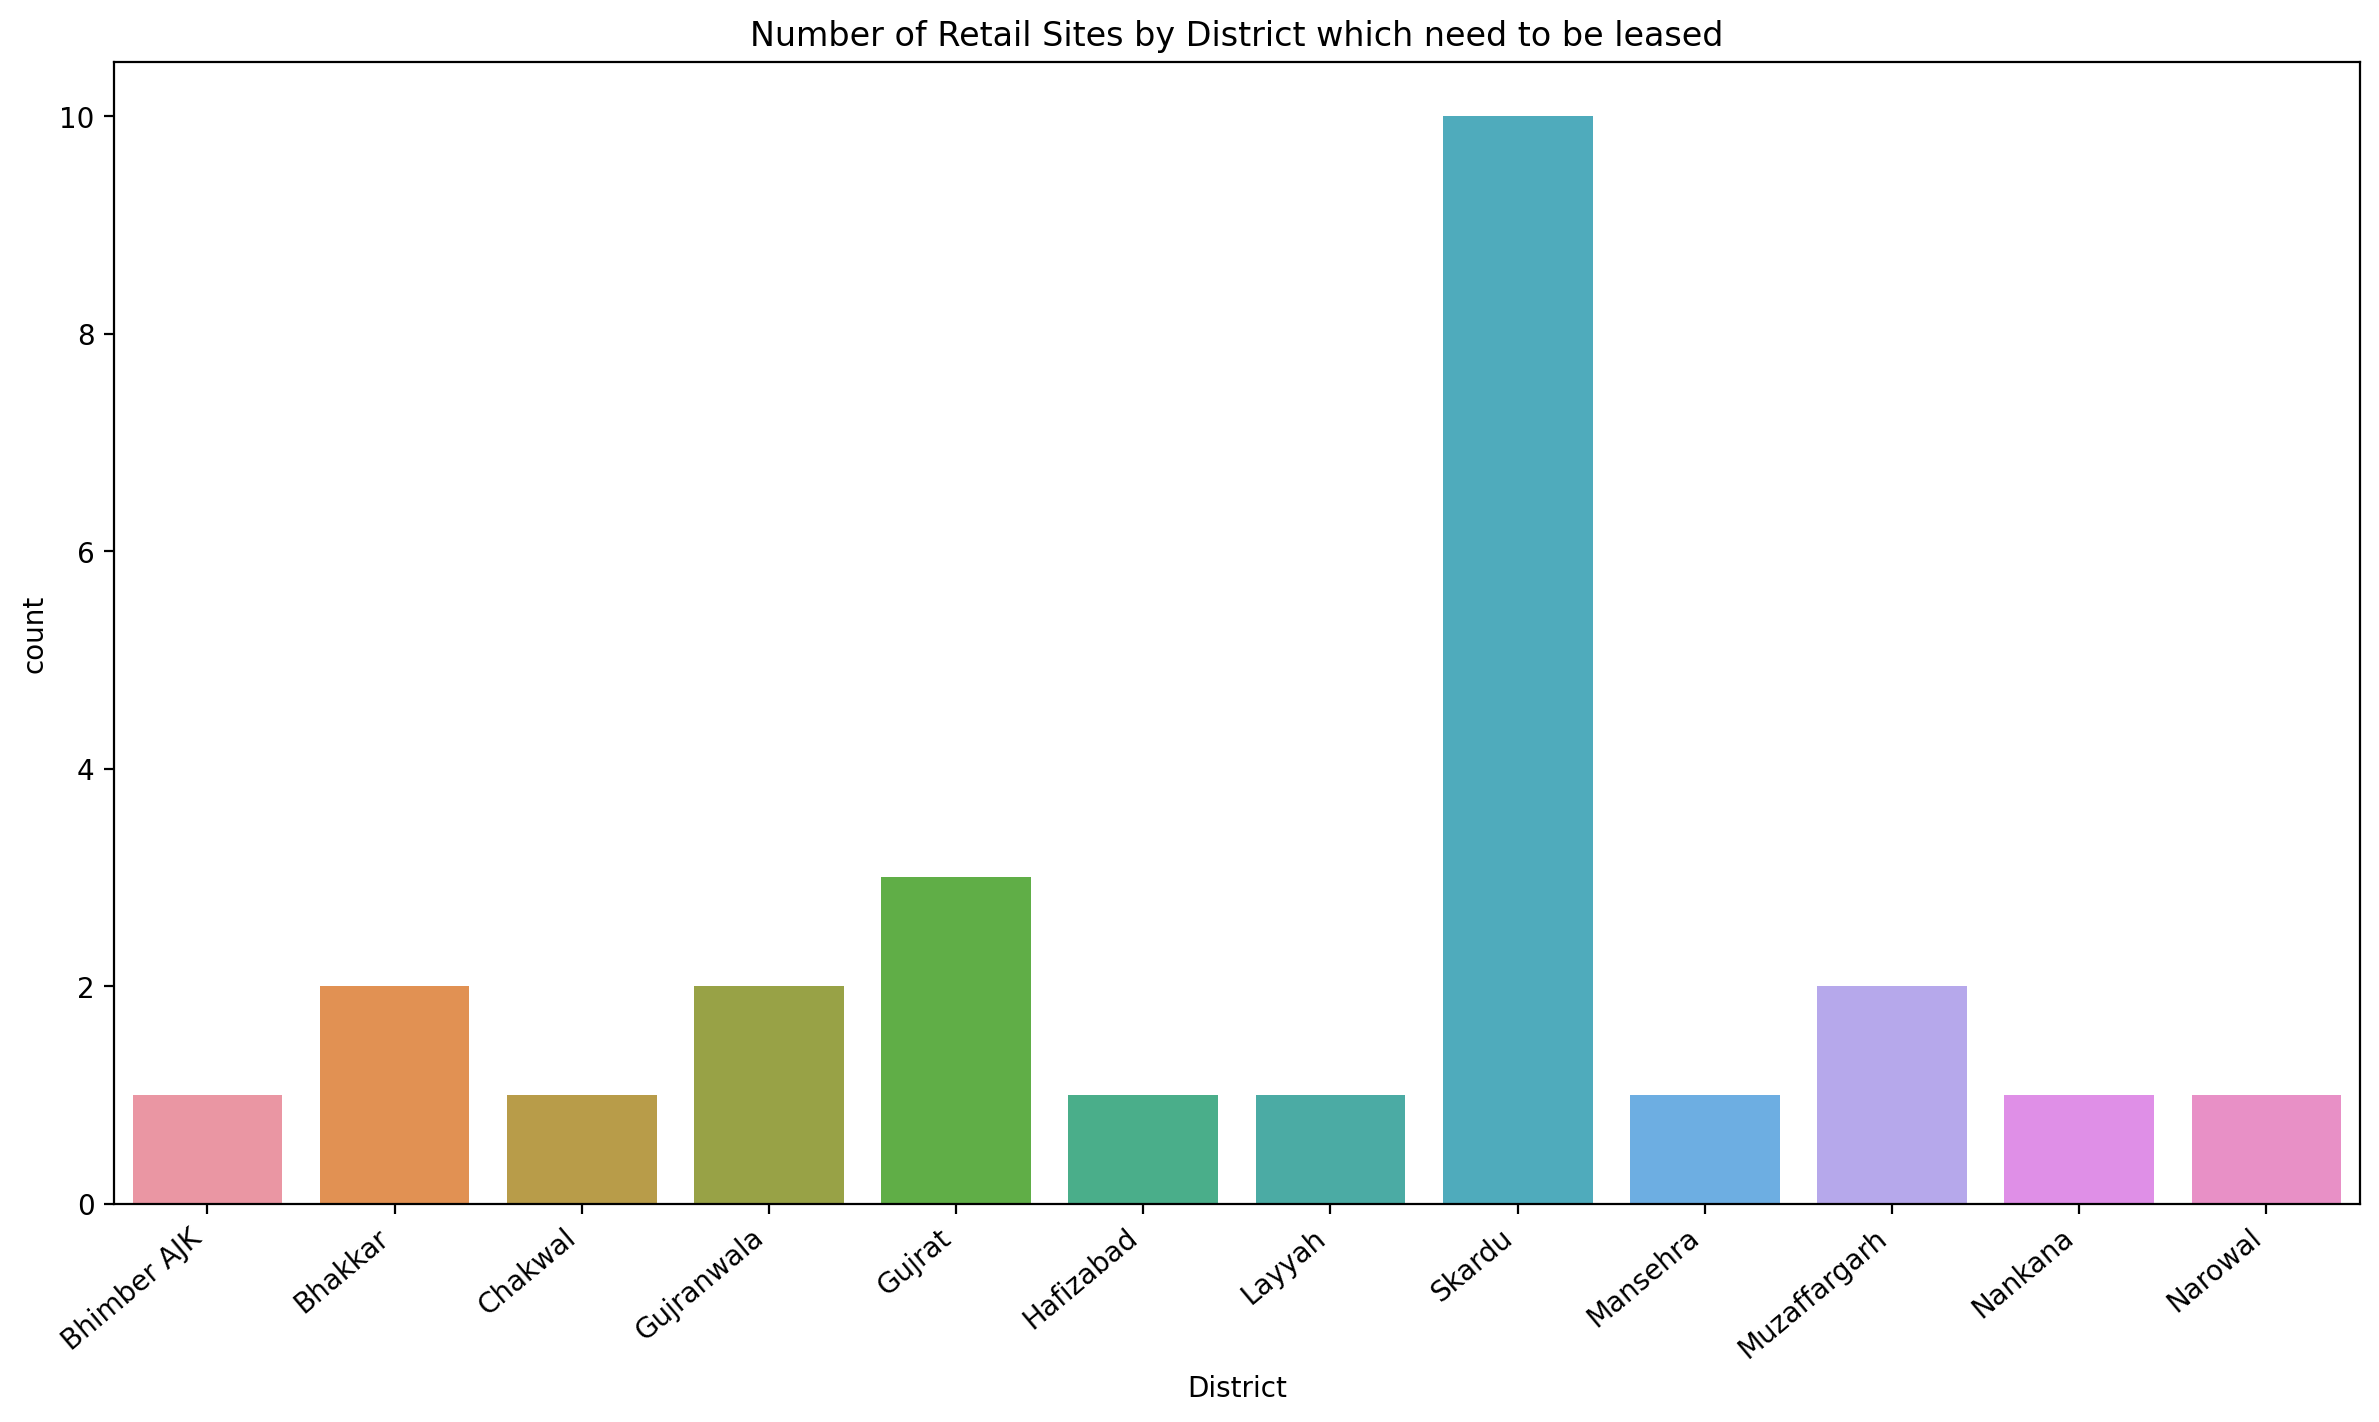

In [262]:
#NOC_Only
#Registered_Sites_Only
#Contruction_Approval_Received
#Form_K_Received
#RTD_Certificate
plt.figure(figsize=(12,7),dpi=200)
sns.countplot(x='District',data=NOC_Only).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Number of Retail Sites by District which need to be leased' )

Text(0.5, 1.0, 'Number of Retail Sites by District which need contruction approval application')

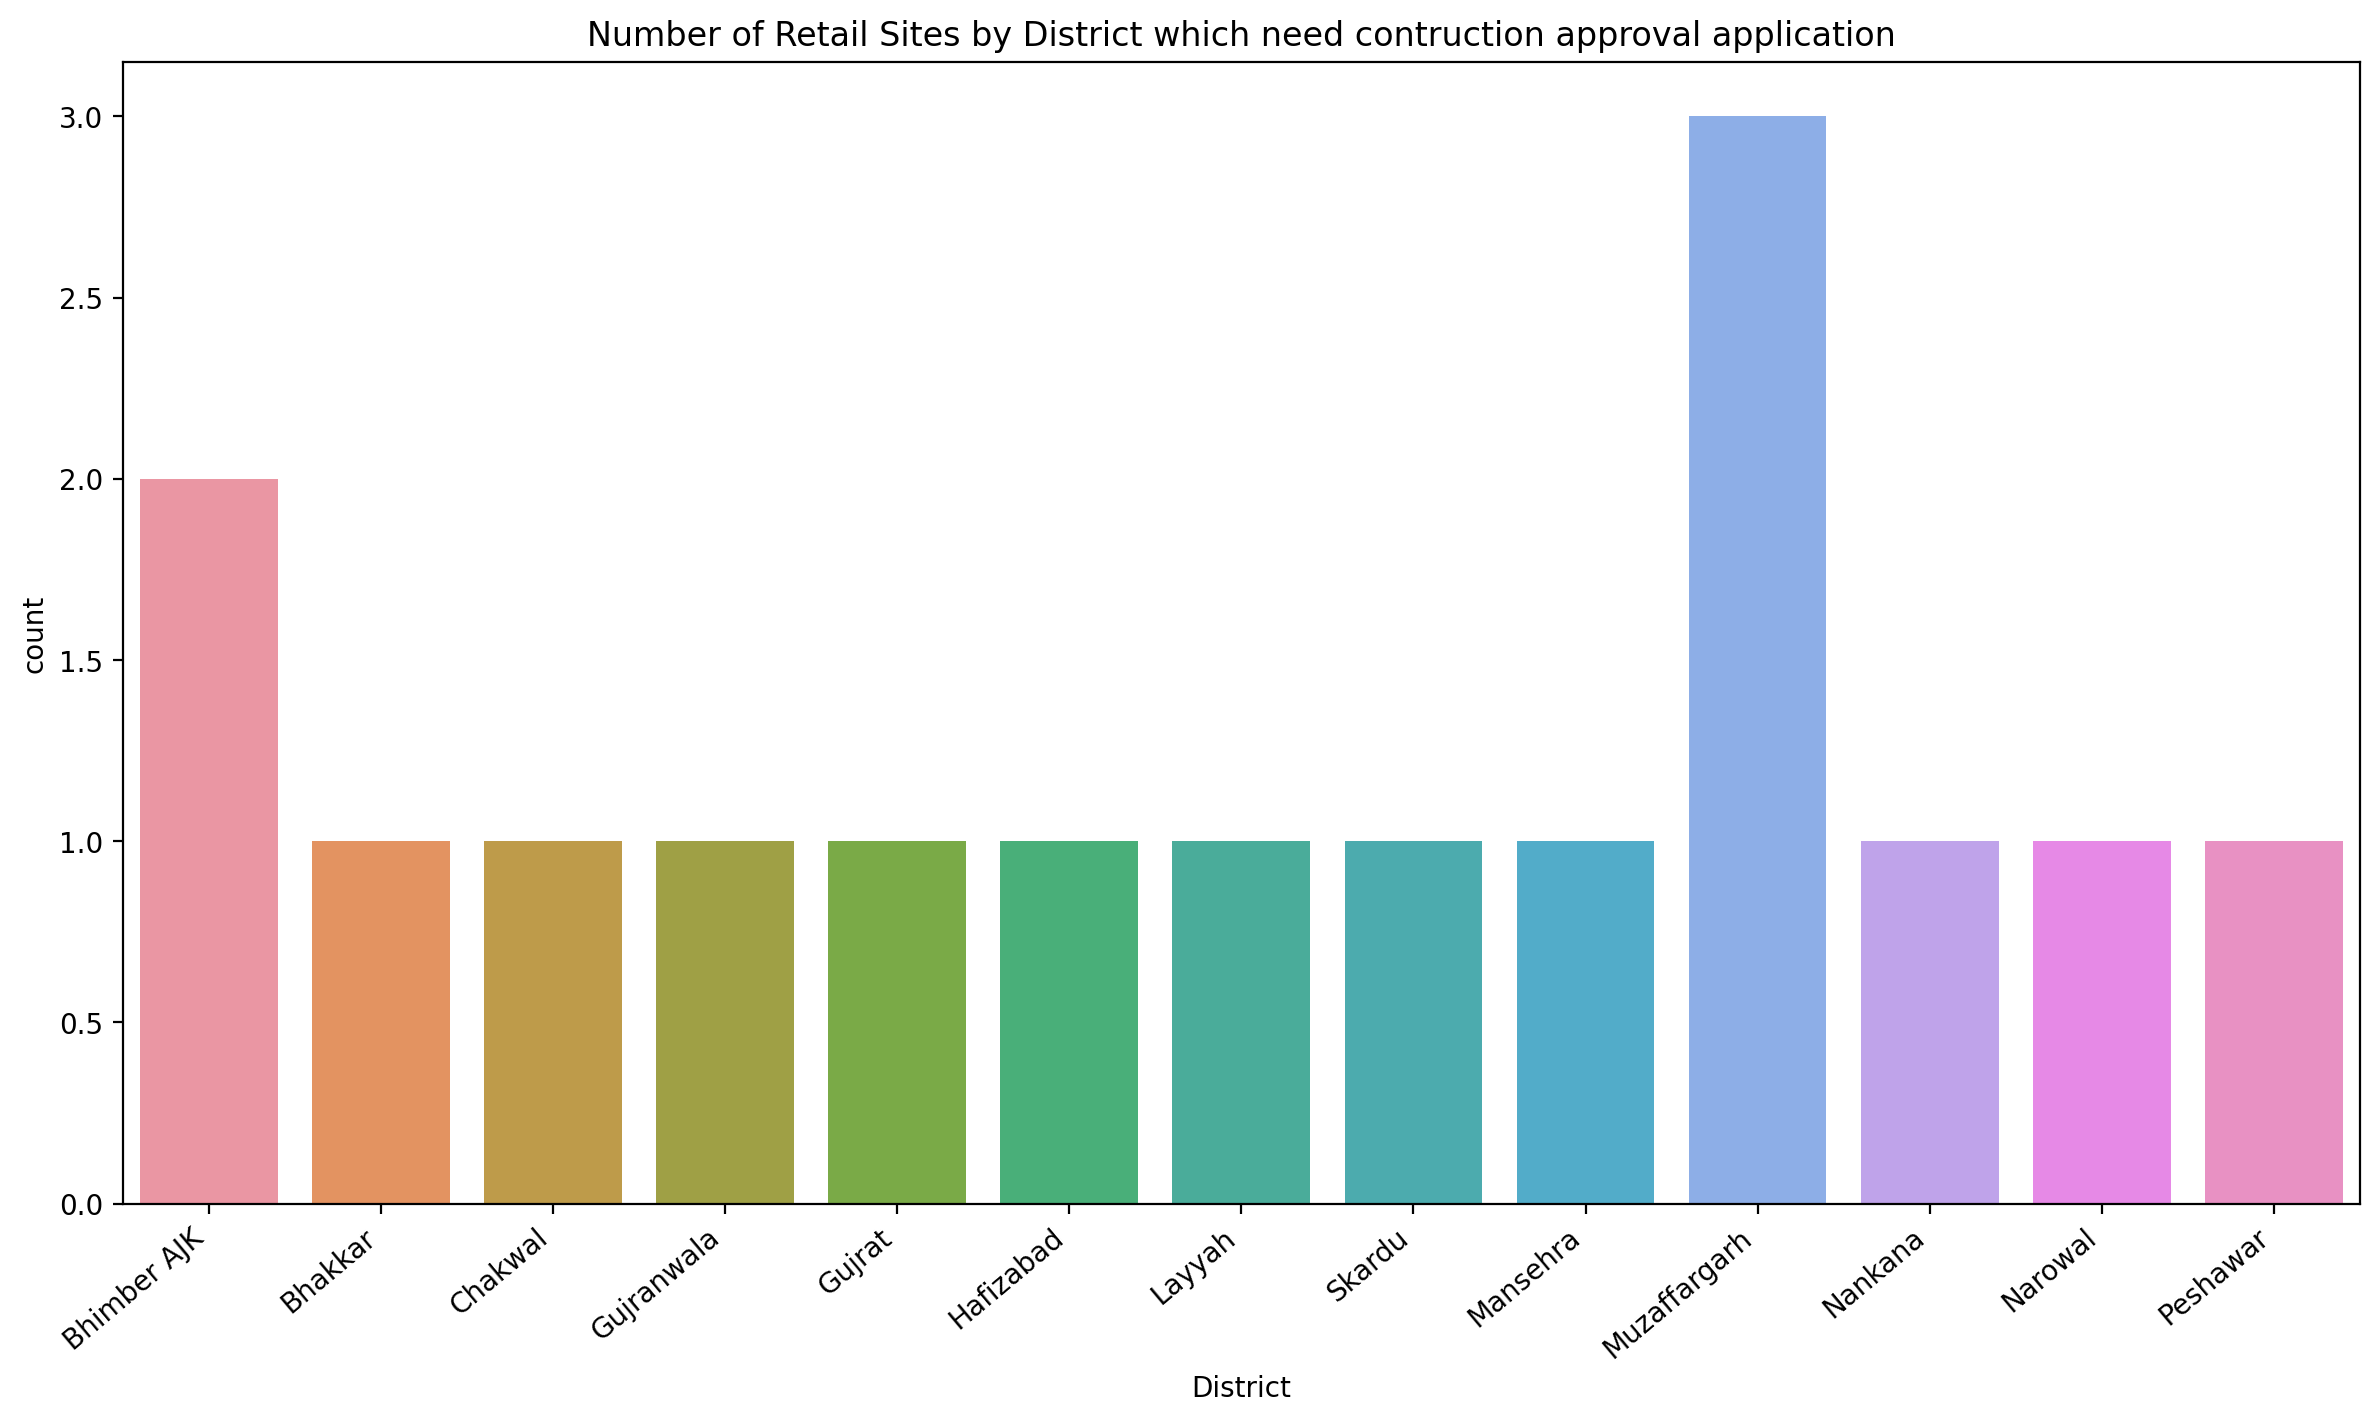

In [261]:
plt.figure(figsize=(12,7),dpi=200)
sns.countplot(x='District',data=Registered_Sites_Only).set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Number of Retail Sites by District which need contruction approval application')

Text(0.5, 1.0, 'Number of Retail Sites by District are under construction')

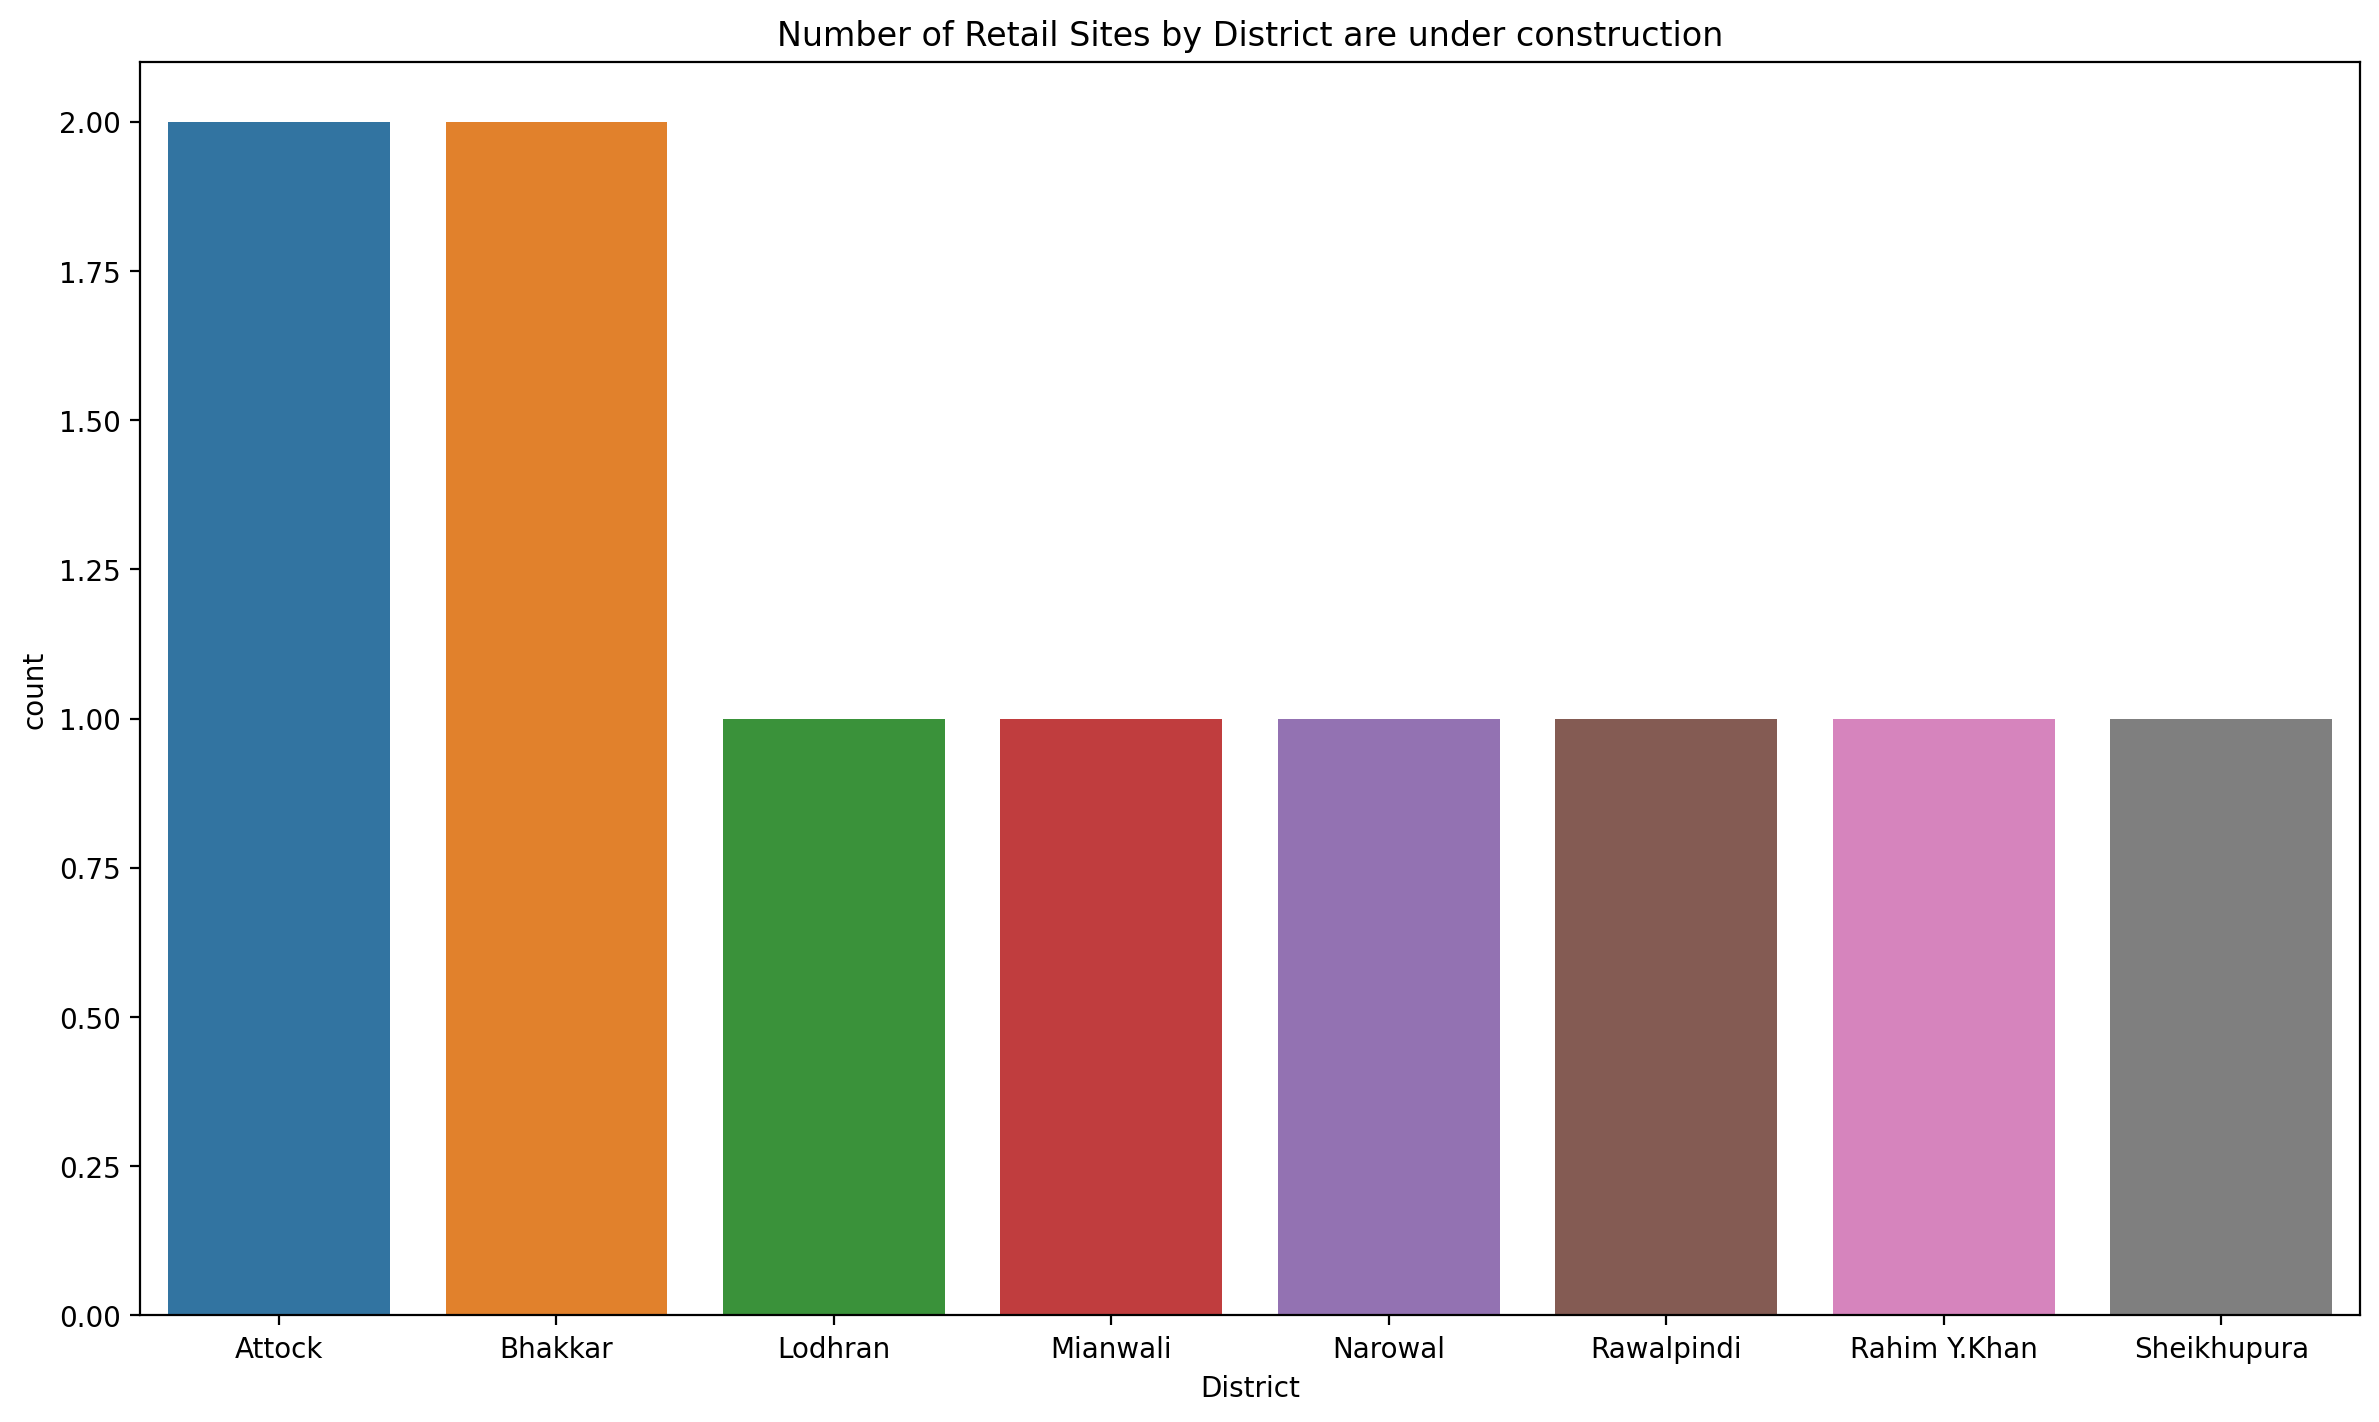

In [232]:
plt.figure(figsize=(12,7),dpi=200)
sns.countplot(x='District',data=Contruction_Approval_Received)
plt.tight_layout()
plt.title('Number of Retail Sites by District are under construction')

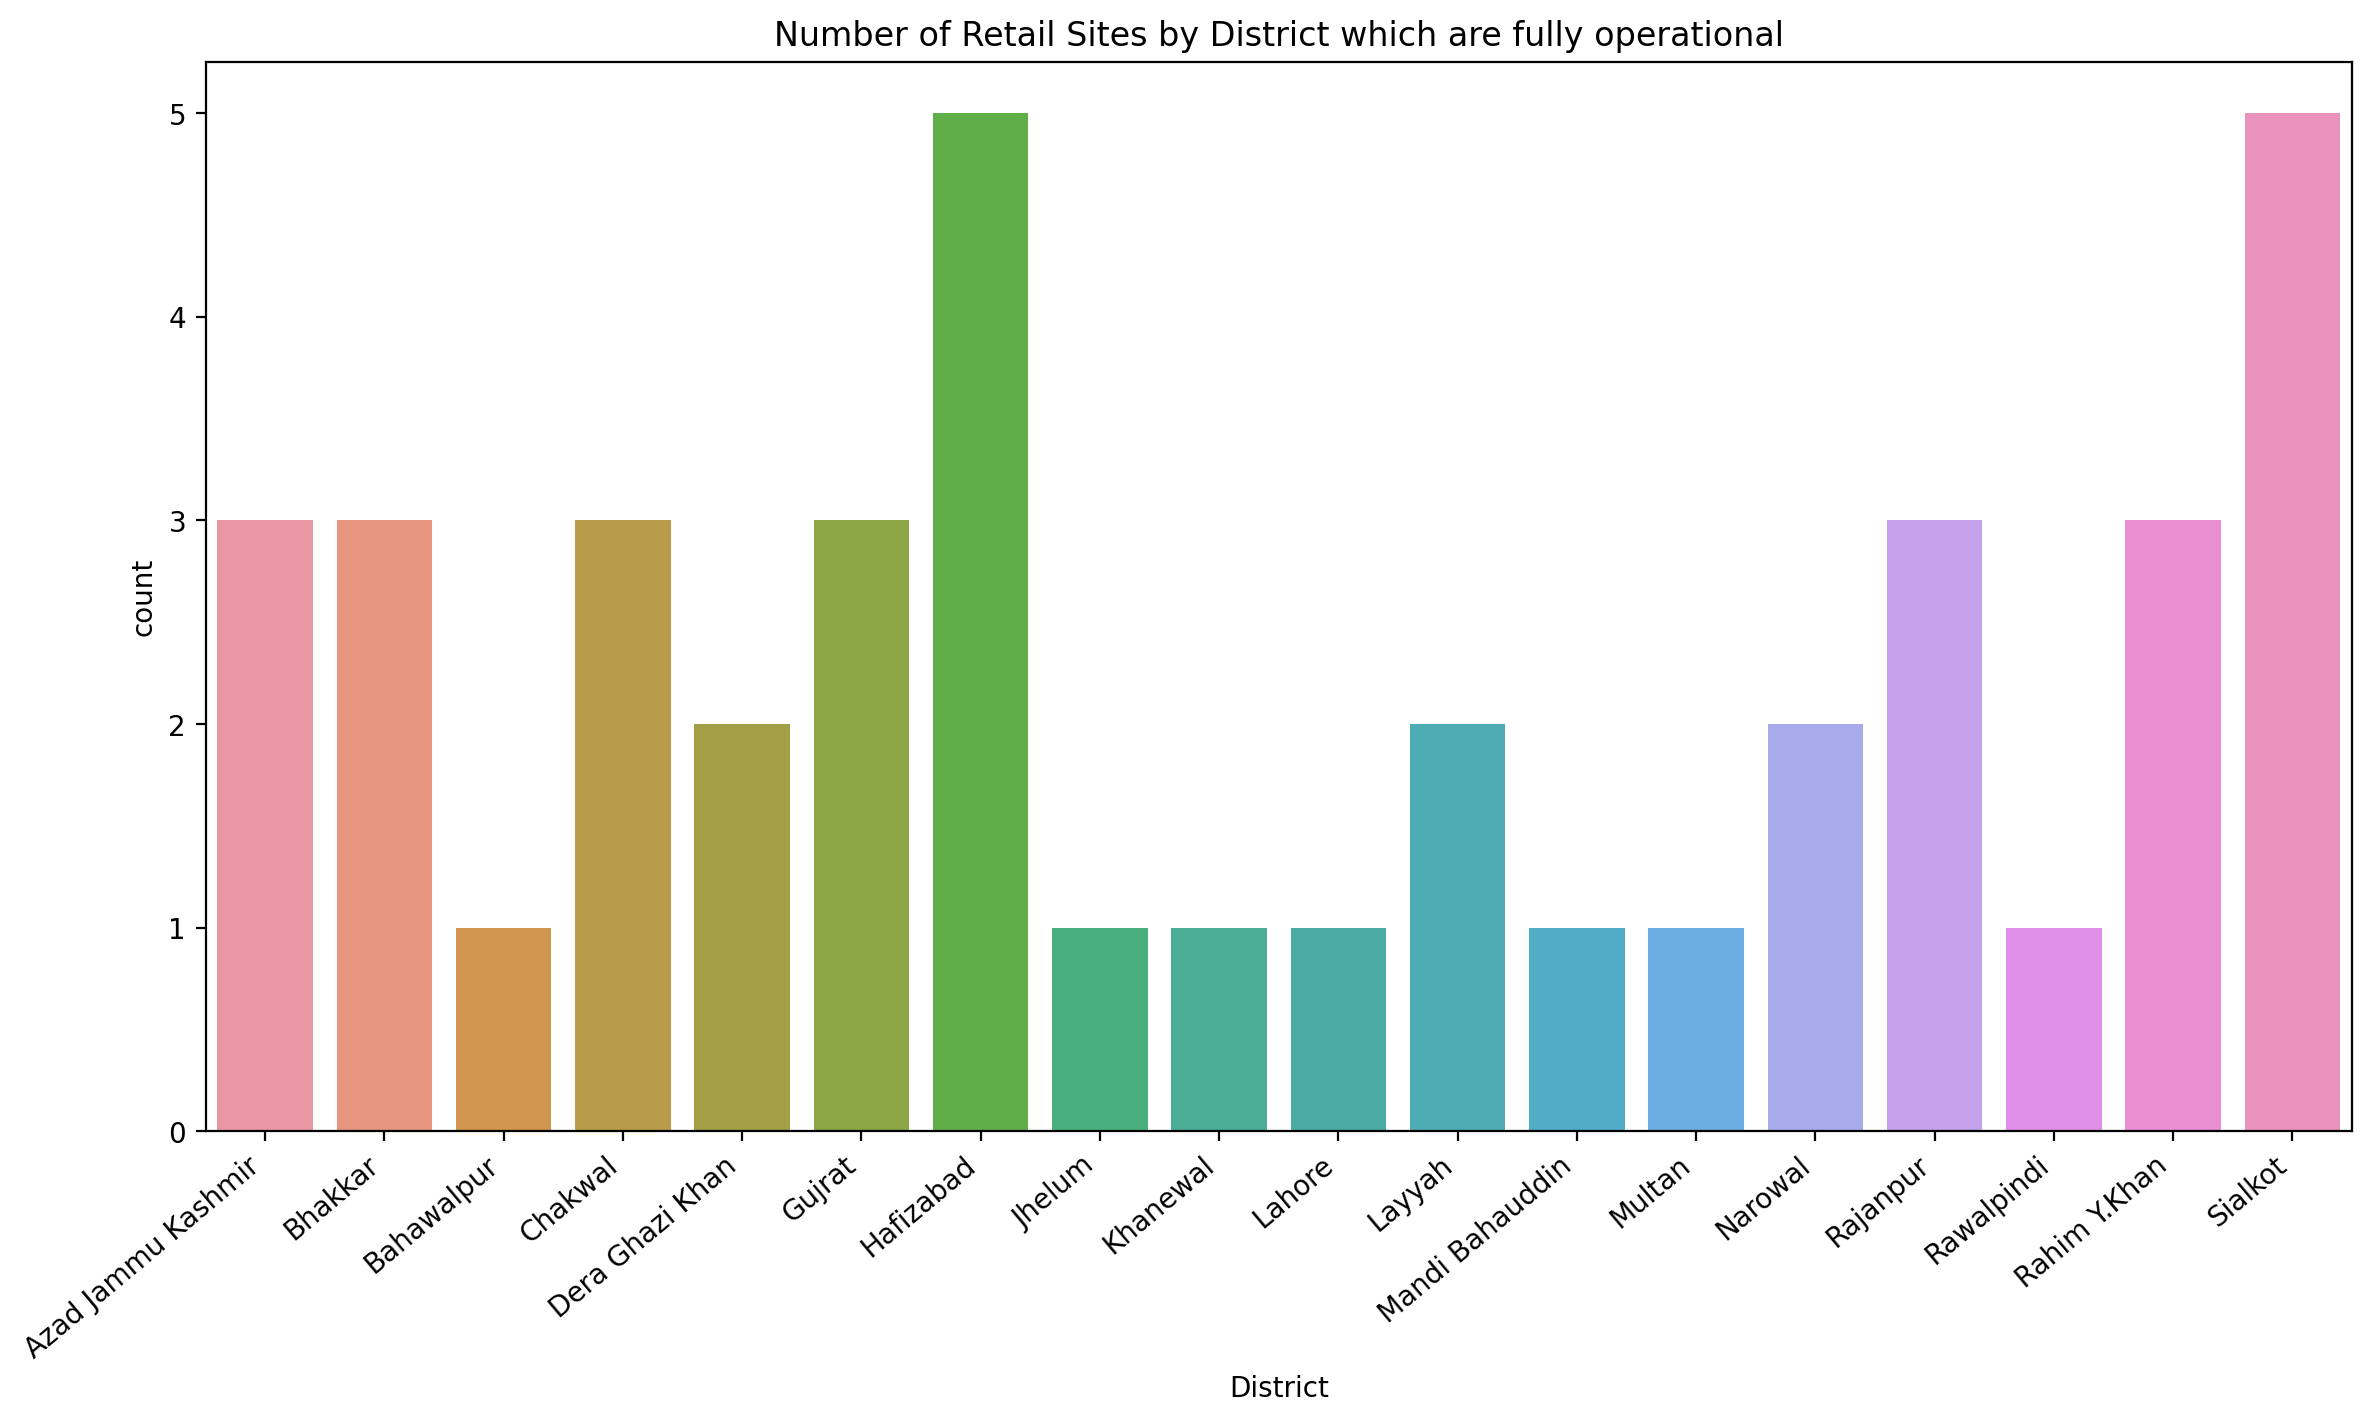

In [233]:
plt.figure(figsize=(12,7),dpi=200)
ax = sns.countplot(x='District',data=Form_K_Received)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Number of Retail Sites by District which are fully operational')
plt.show()

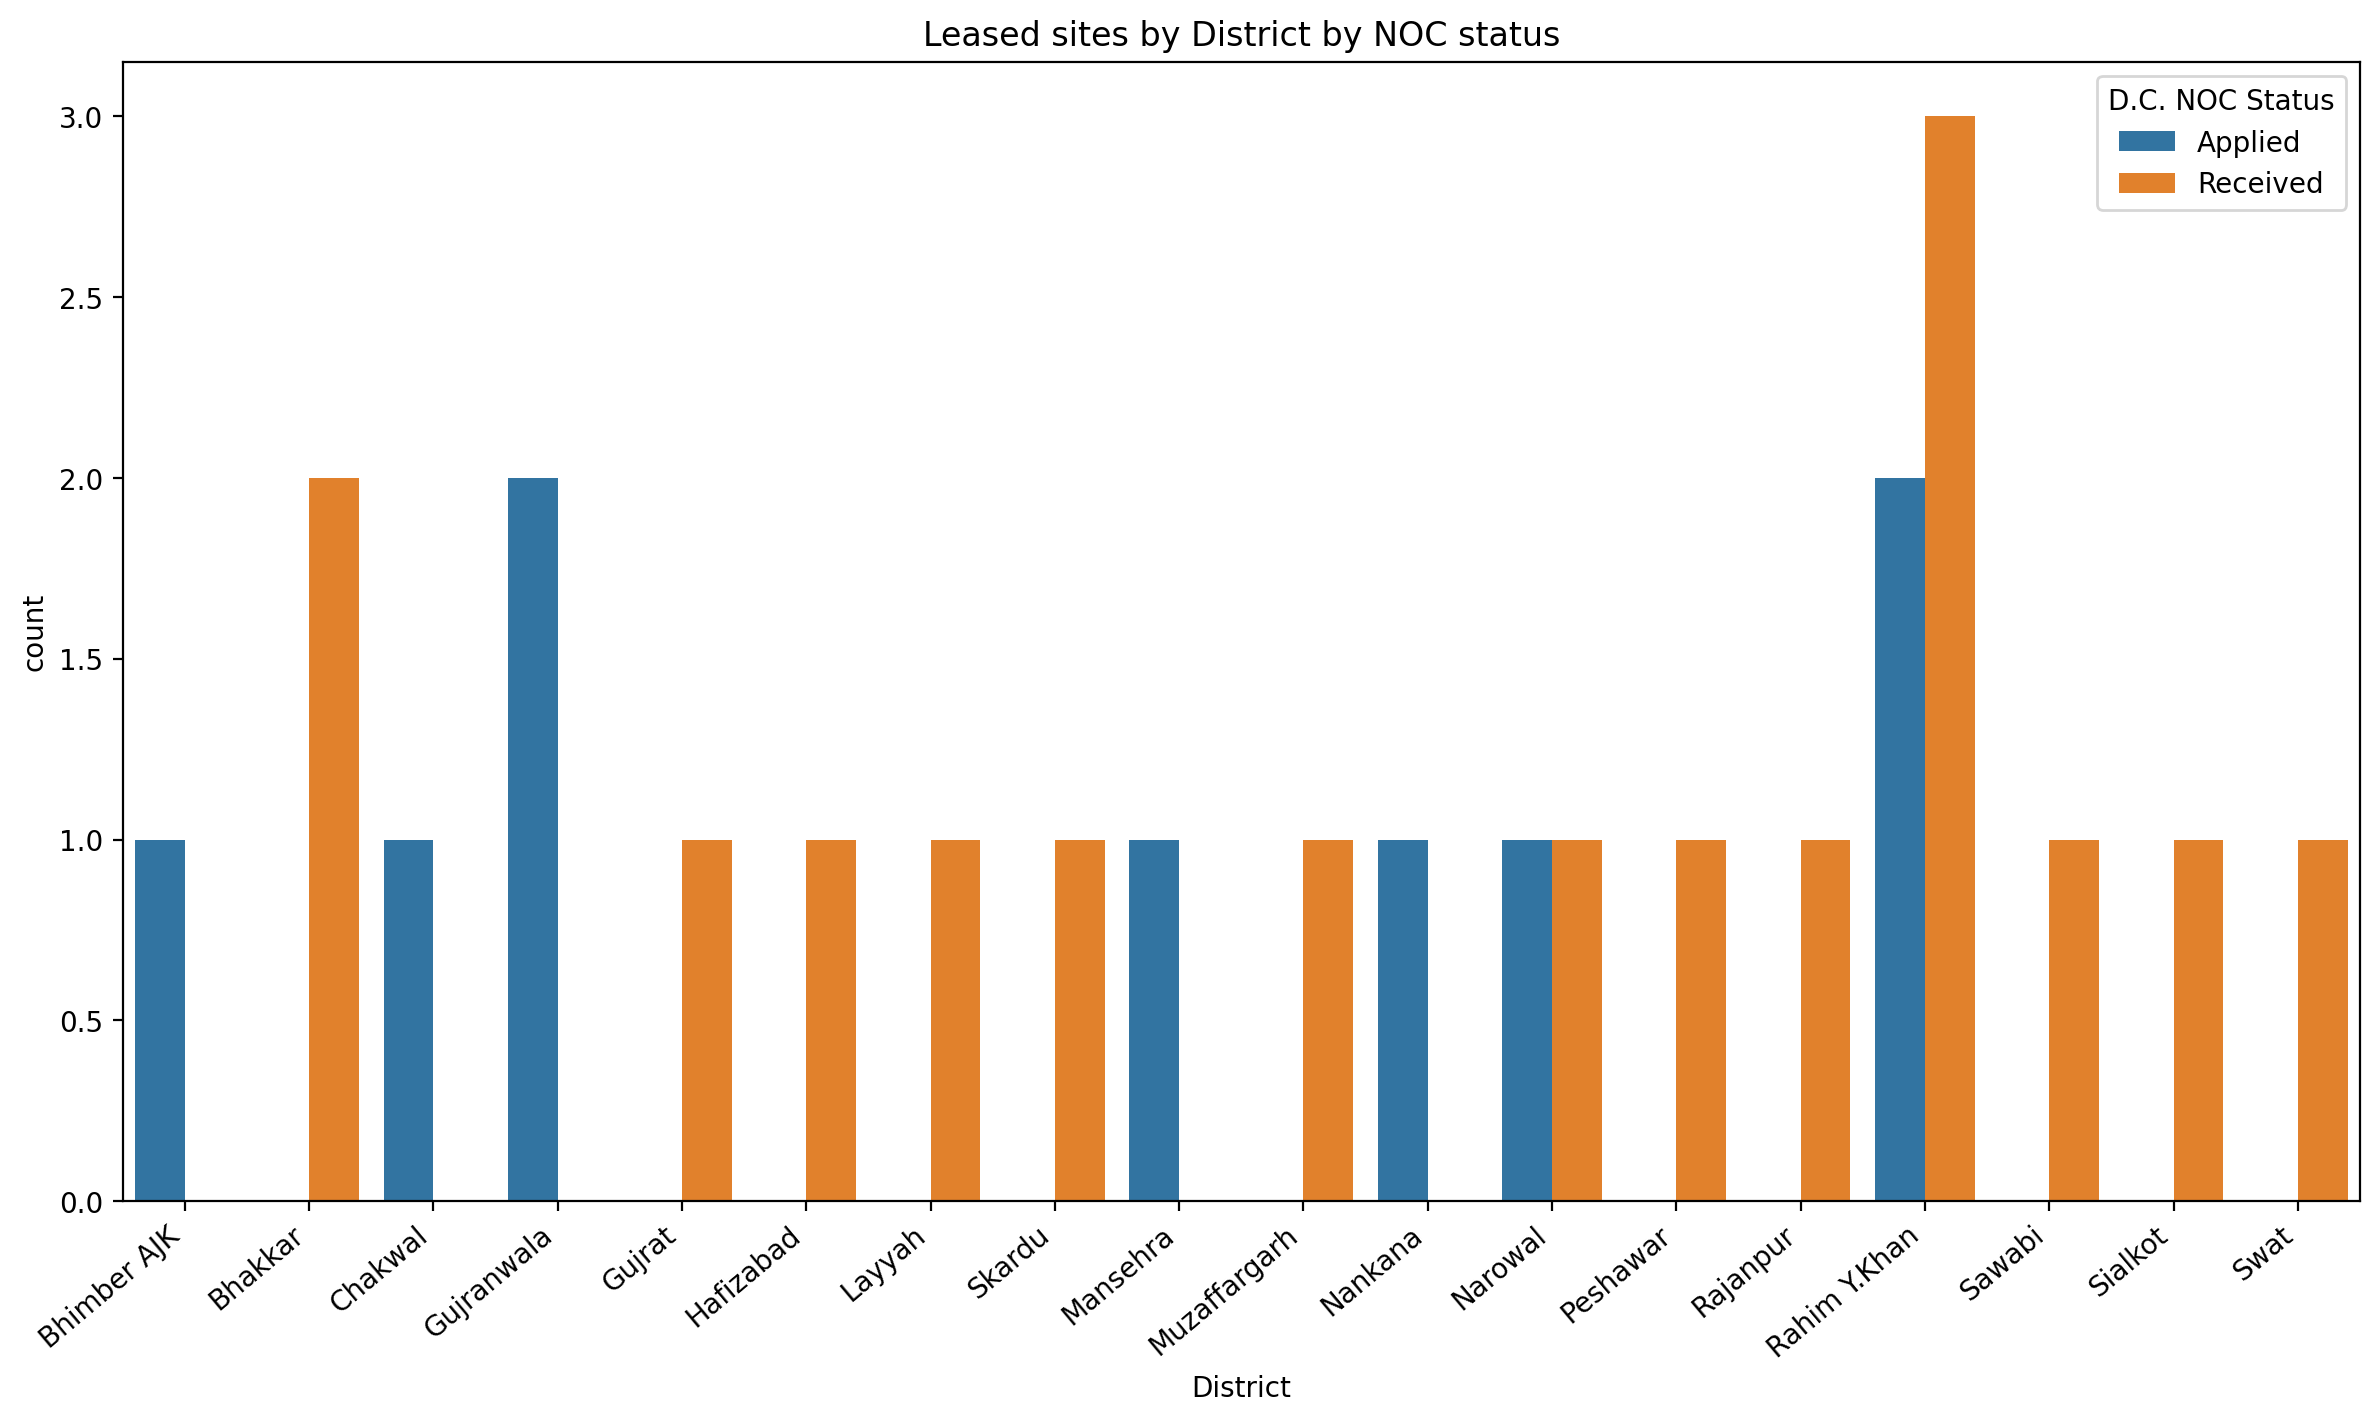

In [234]:
#There are some sites which are very valuable, and thus are leased almost immediately before NOC is received.
#Without NOC and lease, we cannot apply for construction approval so lets find leased sites by their NOC status
Registered_Sites= (df[(df['Lease Status'] == 'Registered') & (df['Construction Approval'].isnull()) &
               (df['Form "K" Status'].isnull()) & (df['RTD Certificate'].isnull())])
plt.figure(figsize=(12,7),dpi=200)
ax = sns.countplot(x='District',data=Registered_Sites, hue = 'D.C. NOC Status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Leased sites by District by NOC status')
plt.show()

In [235]:
#Once a site has been operational after receiving form 'K', company needs to fulfill any investment promises made
#lets find out which sites are these
Operational_Investment[['Dealer Name','Site Address','District','Contact Number', 'Investment']]

,Dealer Name,Site Address,District,Contact Number,Investment
4,Mr. M. Shaukat,"At Mouza Khliqdad, Tehsil Hassan Abadal, Distt:",Attock,"0334-9576160, 0333-5149023",full signage
8,Mr. Manzoor Hussain,khar khato po khas kharian,Azad Jammu Kashmir,0301-6220896,Company Signage
29,Muhammad Farooq,Mouza Qadar Bakhsh Teh. Bahawalpur,Bahawalpur,0300-8674074\n0300-7805074,complete signage
47,Malik Irshad,"At Mouza Gadfai Gharbi, Distt:",Dera Ghazi Khan,0333-8577183,Signage
70,Sajjad Hussain Bukhari,"At Mouza Dinga, on Dinga Kharian Road Tehsil K...",Gujrat,0300-6263284,Road Sign
72,Mian Muhammad Shahbaz,Mouza Narowali,Gujrat,0321-3148786,complete signage
79,Abid Bhatti,"At Mouza Jalalpur Nao, Tehsil Pindi Bhattain",Hafizabad,0300-6529155\n0300-5120000,Signage/Pylon
105,Aziz-Ud-Din,"At Mouza Jiaa Bagga, B/w Km 5/6 From Raiwind o...",Lahore,0321-6000292,Pylon
116,Mr. Arshad Mehmood,"At Mouza Khuthiala Shaikhan, Tehsil & Distt:",Mandi Bahauddin,0302-7755050,Pylon
144,Ejaz Ahmed,"At Mouza Phawari Hinduaan, B/w Km No. 6/7 From...",Narowal,0301-6898098\n0300-7764633,Complete Signages


In [211]:
#Lets put everything in a single map divided by colors
# Red = Sites which need to be leased
# Orange = Sites which need their construction approval to be applied
# Blue = Sites which are under construction
# Green = Sites Which are fully operational

In [244]:
#NOC_Only
#Registered_Sites_Only
#Contruction_Approval_Received
#Form_K_Received
import folium
NOC_Only['Color'] = 'red'
Registered_Sites_Only['Color'] = 'orange'
Contruction_Approval_Received['Color'] = 'blue'
Form_K_Received['Color'] = 'green'

<ipython-input-244-2d7b11698c42>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOC_Only['Color'] = 'red'
<ipython-input-244-2d7b11698c42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Registered_Sites_Only['Color'] = 'orange'
<ipython-input-244-2d7b11698c42>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [245]:
Full_List = ((Form_K_Received[['Existing File No.', 'Latitude', 'Longitude','Color']].values.tolist()) +
             (NOC_Only[['Existing File No.', 'Latitude', 'Longitude','Color']].values.tolist()) +
             (Registered_Sites_Only[['Existing File No.', 'Latitude', 'Longitude','Color']].values.tolist()) +
             (Contruction_Approval_Received[['Existing File No.', 'Latitude', 'Longitude','Color']].values.tolist()))

In [247]:
Operational_Status = folium.Map(location = [33.24024000000003, 72.26609000000008])
fg= folium.FeatureGroup(name = 'Sites Operational Status')

for x in Full_List:
    fg.add_child(folium.Marker(location = [x[1],x[2]],popup = x[0], tooltip = x[0], icon = folium.Icon(color = x[-1], icon = 'circle', prefix = 'fa')))
Operational_Status.add_child(fg)

In [258]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Exceed Petroleum Retail Sites Status (21-03-2019)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:1;'></span>Sites to Lease</li>
    <li><span style='background:orange;opacity:1;'></span>Sites to apply construction approval</li>
    <li><span style='background:blue;opacity:1;'></span>Sites under construction</li>
    <li><span style='background:green;opacity:1;'></span>Operational Sites</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

Operational_Status.get_root().add_child(macro)
Operational_Status

In [259]:
Operational_Status.save('Retail_Sites.html')